## Diff Test

In [5]:
library(prophet)
library(tidyverse)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [14]:
head(iris)
date_vec <- today() + days(0:(nrow(iris) - 1))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.
Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.


ERROR: Error in prophet_plot_components(m, fcst) + ggtitle("activation rate components"): non-numeric argument to binary operator


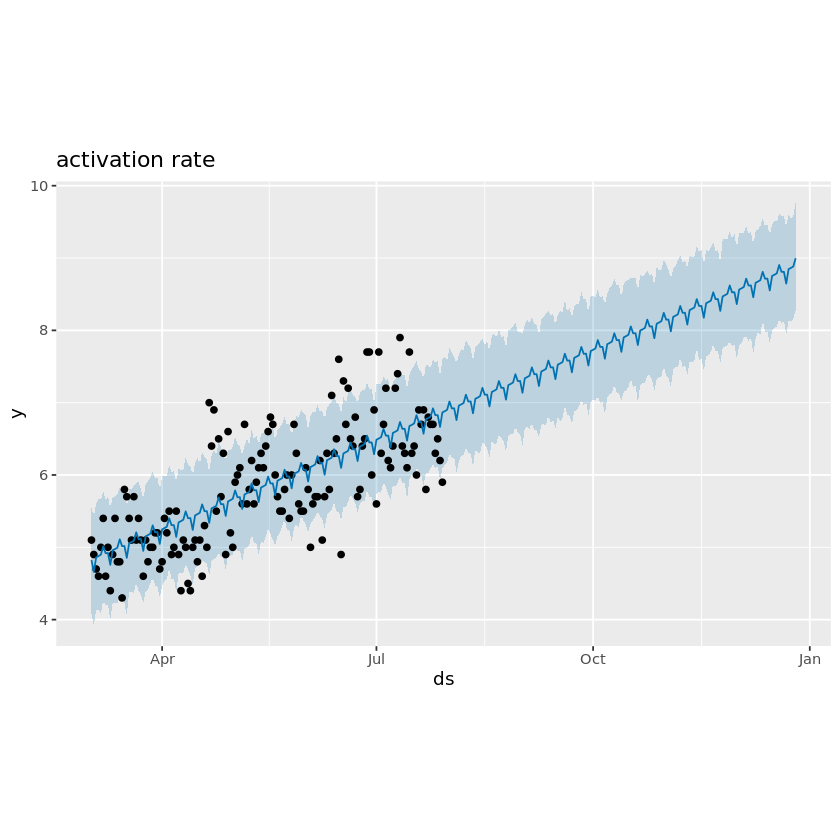

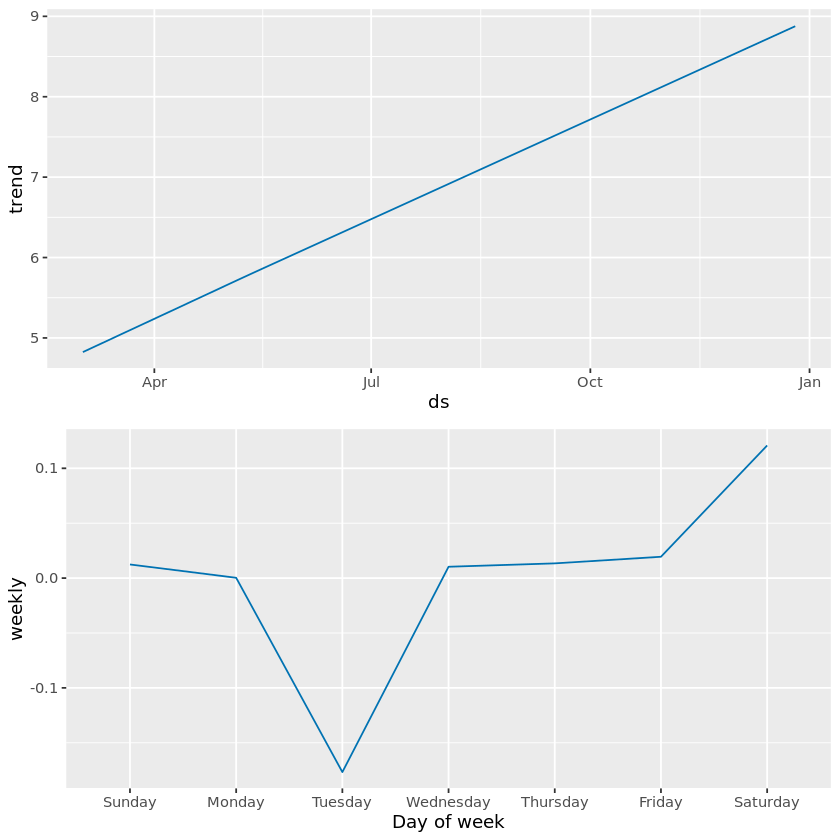

In [20]:
d_m <- iris %>%
    mutate(ds = date_vec) %>%
    rename(y = Sepal.Length) %>%
    select(ds, y)

m <- prophet(d_m)

future <- make_future_dataframe(m, periods = 150, freq = 'day')
fcst <- predict(m, future)

plot(m, fcst) +
ggtitle("activation rate")
prophet_plot_components(m, fcst) +
ggtitle("activation rate components")